# notMNIST 
### Assignment 1 Problem 6

In [24]:
from __future__ import print_function
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import os
import sys
import tarfile
from IPython.display import display, Image
from scipy import ndimage
from sklearn.linear_model import LogisticRegression
from six.moves.urllib.request import urlretrieve
from six.moves import cPickle as pickle
from sklearn.metrics import accuracy_score

import matplotlib.cm as cm

import string
import random

In [19]:
pickle_file = 'notMNIST.pickle'

def unpickle_file(file_name):
    """
    Unpickling the notMNIST.pickle
    """
    try:
        with open(file_name, 'rb') as f:
            all_data = pickle.load(f)                        
    finally:
        f.close()
    return all_data

dataset = unpickle_file(pickle_file)

In [20]:
def prepare_data(dataset):
    X_train =[np.array(dat).flatten() for dat in dataset['train_dataset']]
    Y_train = dataset['train_labels']

    X_valid = [np.array(dat).flatten() for dat in dataset['valid_dataset']]
    Y_valid = dataset['valid_labels']

    X_test = [np.array(dat).flatten() for dat in dataset['test_dataset']]
    Y_test = dataset['test_labels']
    
    return X_train, Y_train, X_valid, Y_valid, X_test, Y_test

X_train, Y_train, X_valid, Y_valid, X_test, Y_test = prepare_data(dataset)

In [43]:
def fit_predict_model(X_train, Y_train, X_test, Y_test):
    clf = LogisticRegression()
    clf.fit(X_train,Y_train)
    pred = clf.predict(X_test)
    acc = accuracy_score(pred, Y_test)
    print(acc)
    return pred
    
prediction = fit_predict_model(X_train[:1000], Y_train[:1000], X_test, Y_test)
    

0.8244


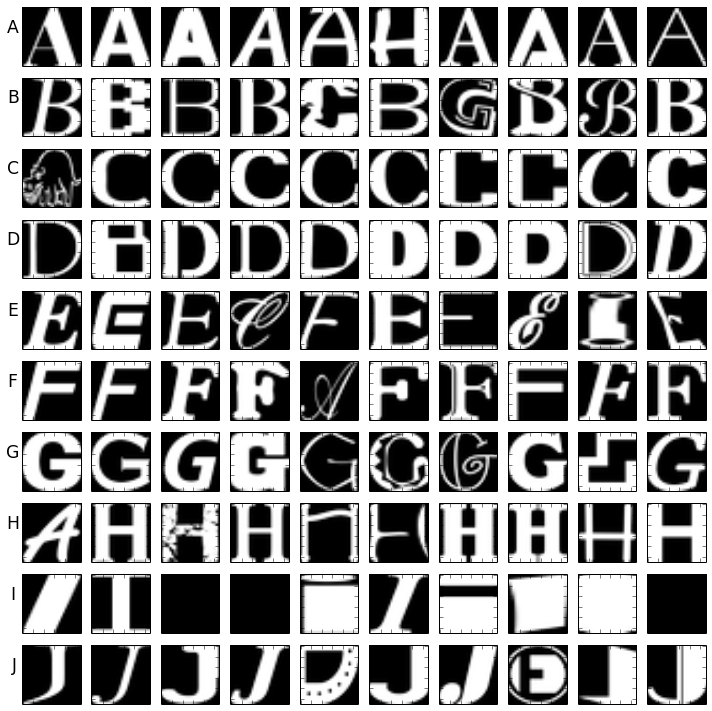

In [22]:
def random_check(datast, datast_label):
    random_sample_dict = {}
    sample_count = 0
    data_n_lable = zip(datast, datast_label)
    random.shuffle(data_n_lable)
    for dat,lab in data_n_lable:
        if lab in random_sample_dict.keys():
            if len(random_sample_dict[lab]) >= 10:
                #Confused with this logic and yes this is my own code, 
                # It works but .. don't know why it is like this
                pass
            else:
                random_sample_dict[lab].append(dat)
                sample_count += 1
        else:
            random_sample_dict[lab] = [dat]
            sample_count += 1
        if sample_count == 100:
            break
    return random_sample_dict

def plot_samples(sample_dict):
    """
    Displaying a sample of the labels and images from the ndarray 
    """
    #lable_list = string.ascii_uppercase[:10]    
    fig, axes = plt.subplots(nrows=10, ncols=10 , figsize=(10, 10))
    
    plt.figure(1)
    count = 0
    row = 0  
    lable_list = []
    #print(sample_dict.items())
    for lable_name,images in sample_dict.items():
        col = 0
        #print("label: {},".format(label))
        lable_list.append(lable_name)
        for image in images:
            axes[row,col].imshow(image,cmap = cm.Greys_r)
            axes[row,col].xaxis.set_ticklabels([])
            axes[row,col].yaxis.set_ticklabels([])
            col += 1
            count += 1
        row += 1       
    alphabets = string.ascii_uppercase[:10]
    for ax, row in zip(axes[:,0], [alphabets[i] for i in lable_list] ):
        ax.set_ylabel(row, rotation=0, size='xx-large')
    fig.tight_layout()
    plt.show()
    
plot_samples(random_check(dataset['test_dataset'], prediction))    

Completed iteration for size of data : 10
Completed iteration for size of data : 20010
Completed iteration for size of data : 40010
Completed iteration for size of data : 60010
Completed iteration for size of data : 80010
Completed iteration for size of data : 100010
Completed iteration for size of data : 120010
Completed iteration for size of data : 140010
Completed iteration for size of data : 160010
Completed iteration for size of data : 180010
Training errors : [1.0, 0.86786606696651669, 0.84561359660084978, 0.83919346775537407, 0.83624546931633548, 0.83437656234376567, 0.83306391134072155, 0.83200485679594316, 0.83170426848321977, 0.83140936614632521] 
 Testing errors : [0.44750000000000001, 0.87429999999999997, 0.88200000000000001, 0.88539999999999996, 0.88949999999999996, 0.89119999999999999, 0.89119999999999999, 0.89100000000000001, 0.89180000000000004, 0.89270000000000005]


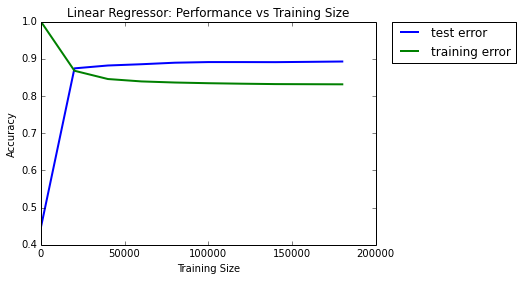

In [39]:
def learning_curve(X_train, Y_train, X_test, Y_test):
    diff_sizes = range(10,200000,20000)
    test_error = []
    train_error = []
    for siz in diff_sizes:
        clf = LogisticRegression()
        clf.fit(X_train[:siz],Y_train[:siz])
        pred_test = clf.predict(X_test)
        pred_train = clf.predict(X_train[:siz])
        test_error.append(accuracy_score(pred_test, Y_test))
        train_error.append(accuracy_score(pred_train[:siz], Y_train[:siz]))
        print("Completed iteration for size of data : {}".format(siz))
        
    print("Training errors : {} \n Testing errors : {}".format(train_error,test_error))
    learning_curve_graph(diff_sizes, train_error, test_error)   
    
def learning_curve_graph(sizes, train_err, test_err):
    """
    Plot training and test error as a function of the training size.
    References:
        - Udacity Machine Learning Nano Degree, Project 1 (Boston housing price prediction)
    
    """
    plt.figure()
    plt.title('Linear Regressor: Performance vs Training Size')
    plt.plot(sizes, test_err, lw=2, label = 'test accuracy')
    plt.plot(sizes, train_err, lw=2, label = 'training accuracy')
    #plt.legend()
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.xlabel('Training Size')
    plt.ylabel('Accuracy')
    plt.show() 
    
learning_curve(X_train, Y_train, X_test, Y_test) 

Confusion Matrix : 
[[ 809.   25.   18.   12.    6.    6.   16.   61.   28.   19.]
 [   5.  821.   15.   45.   34.   22.   15.   11.   18.   14.]
 [   5.   11.  877.    9.   43.    7.   21.    5.   14.    8.]
 [   9.    7.   11.  878.   18.   10.   11.    5.   29.   22.]
 [  10.   35.   54.   17.  747.   31.   15.   11.   68.   12.]
 [  15.   12.   15.    8.   19.  845.    7.    7.   31.   41.]
 [  19.   15.   91.   16.   13.   17.  795.    4.   12.   18.]
 [  16.   18.   25.   13.   21.   23.    5.  832.   18.   29.]
 [  27.   18.   14.   11.   25.   15.   14.   12.  813.   51.]
 [  23.   13.   18.   22.    7.   12.    5.    8.   65.  827.]]


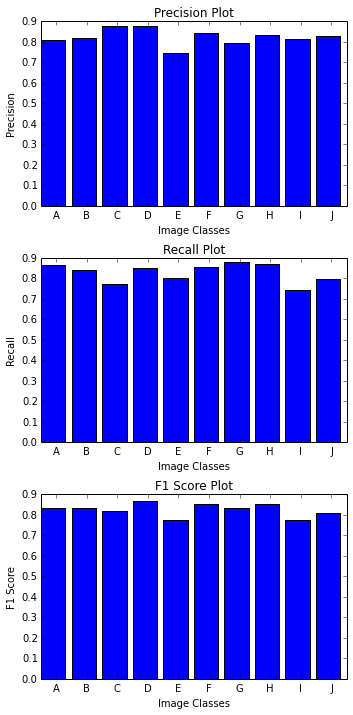

In [80]:
def confusion_matrix(ori_labels, pred_labels):
    confision_matrix = np.zeros((10, 10))
    for ori_lab, pred_lab in zip(ori_labels, pred_labels):
        confision_matrix[ori_lab, pred_lab] += 1
    return confision_matrix

def recall(confusion_mat,lab):
    #print("True Positives : {} \nTrue Positives + False Negetives : {}".format(confusion_mat[lab,lab],np.sum(confusion_mat[:,lab])))
    rec = confusion_mat[lab,lab]/np.sum(confusion_mat[:,lab])
    #print("Recall for class {} : {}".format(lab,rec))
    return rec

def precision(confusion_mat,lab):
    #print("True Positives : {} \nTrue Positives + False Positives : {}".format(confusion_mat[lab,lab],np.sum(confusion_mat[lab,:])))
    prec = confusion_mat[lab,lab]/np.sum(confusion_mat[lab,:])
    #print("Precision for class {} : {}".format(lab,prec))
    return prec

def f1_score(confusion_mat,lab):
    return 2*(precision(confusion_mat,lab)*recall(confusion_mat,lab)) / (precision(confusion_mat,lab) + recall(confusion_mat,lab))

def plot_recall_n_precision(confusion_mat):
    """
    Check the number of images under each class or label
    and plot a histogram to see if the dataset is balanced
    """
    print("Confusion Matrix : \n{}".format(confusion_mat))
    recall_list = [recall(confusion_mat,x) for x in range(10)]
    precision_list = [precision(confusion_mat,x) for x in range(10)]
    f1score_list = [f1_score(confusion_mat,x) for x in range(10)]
    
    plt.figure()
    fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(5, 10))
    #print(axes) 
    axes[0].bar(range(10),precision_list)
    labels = string.uppercase[:10]
    axes[0].set_xticks([x + 0.5 for x in range(10)])
    axes[0].set_xticklabels(labels)
    axes[0].set_ylabel('Precision')
    axes[0].set_xlabel('Image Classes')
    axes[0].set_title('Precision Plot')
    
    axes[1].bar(range(10),recall_list)
    axes[1].set_xticks([x + 0.5 for x in range(10)])
    axes[1].set_xticklabels(labels)
    axes[1].set_ylabel('Recall')
    axes[1].set_xlabel('Image Classes')
    axes[1].set_title('Recall Plot')
    
    axes[2].bar(range(10),f1score_list)
    axes[2].set_xticks([x + 0.5 for x in range(10)])
    axes[2].set_xticklabels(labels)
    axes[2].set_ylabel('F1 Score')
    axes[2].set_xlabel('Image Classes')
    axes[2].set_title('F1 Score Plot')
    
    fig.tight_layout()
    plt.show()
                      

#confusion_matrix(Y_test,prediction)

#recall(confusion_matrix(Y_test,prediction),8)
#precision(confusion_matrix(Y_test,prediction),8)
plot_recall_n_precision(confusion_matrix(Y_test,prediction))
        
    